# Evaluation Project - 5
Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Take the top  5 datas
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#Checking the shape
df.shape

(32560, 15)

In [6]:
#Getting more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##There are many object (categorical)columns are present ,we need to convert to numerical data

In [7]:
#Getting statical information 
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values present in this data set.

In [9]:
sum(df.duplicated())

24

There are 24 duplicated values present in this datasets and we need to drop the duplicate values.


In [10]:
df1=df.drop_duplicates()
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
df1.shape

(32536, 15)

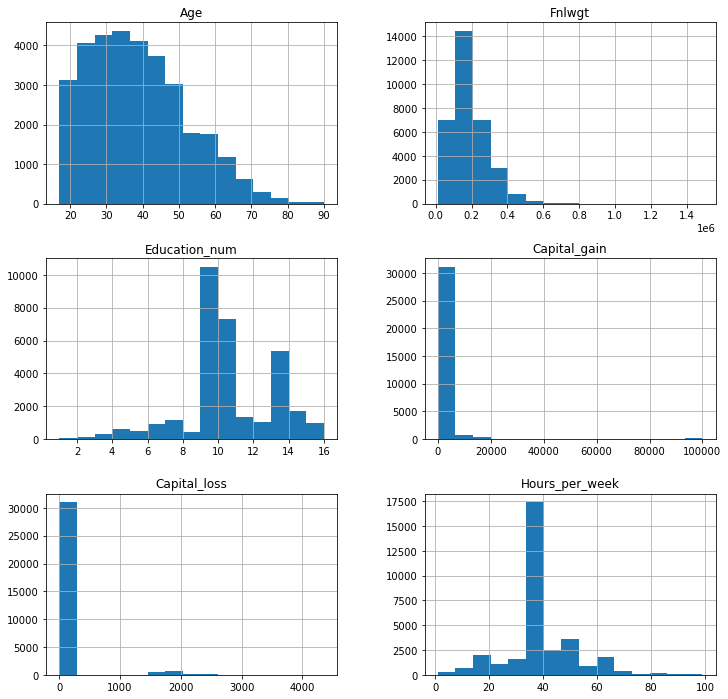

In [12]:
df1.hist(figsize=(12,12),bins=15)
plt.show()



final weight has skewedright side and ,education num column has leftside skewness and , we can see max number of skewness in capital loss and capital gain and,age column has normal distribution and hours per week has slightly normal distributed.

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

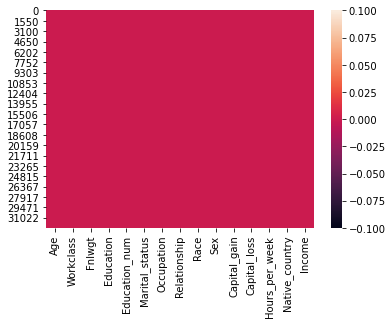

In [15]:
sns.heatmap(df1.isnull())

In [16]:
df1.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

There are no unique are present

# Exploratory data analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

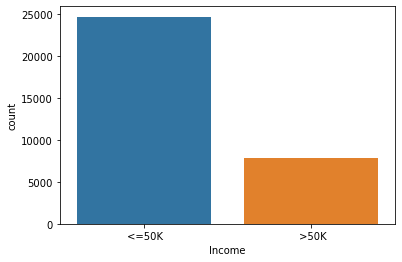

In [17]:
#let's visualize the count of taret variable using seaborn
sns.countplot(df1['Income'])


Our target column data is imbalanced we do balnce the data after some time

In [18]:
df1['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

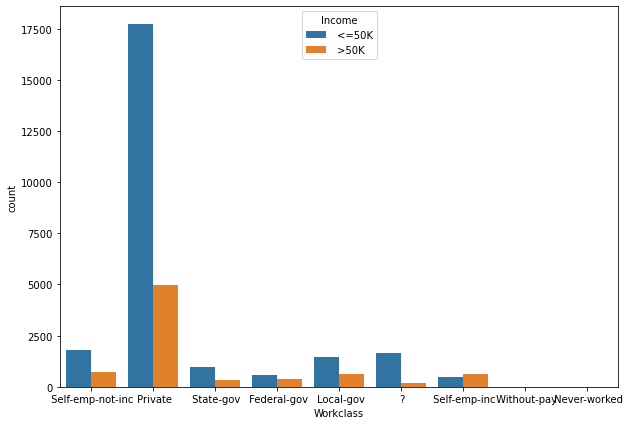

In [19]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(10,7))
sns.countplot(x='Workclass',hue='Income',data=df1)



As per the above plot, we observed that most of the people workclass are private in census are lessthan 50k get around 17500 and remaining 4673 something get less than 50k census income and remaing all data worlplass are in range between 0 to 2000 and last two are least workplass in census_income one more thing we observed a quitionmark(?) what it is in this column and it has some counts of range between 0 to 2000 in that column so we think this will not be considered as missing values in the dataset as it might be the people would have missed this field or choose not to disclose.

In [20]:
df1['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

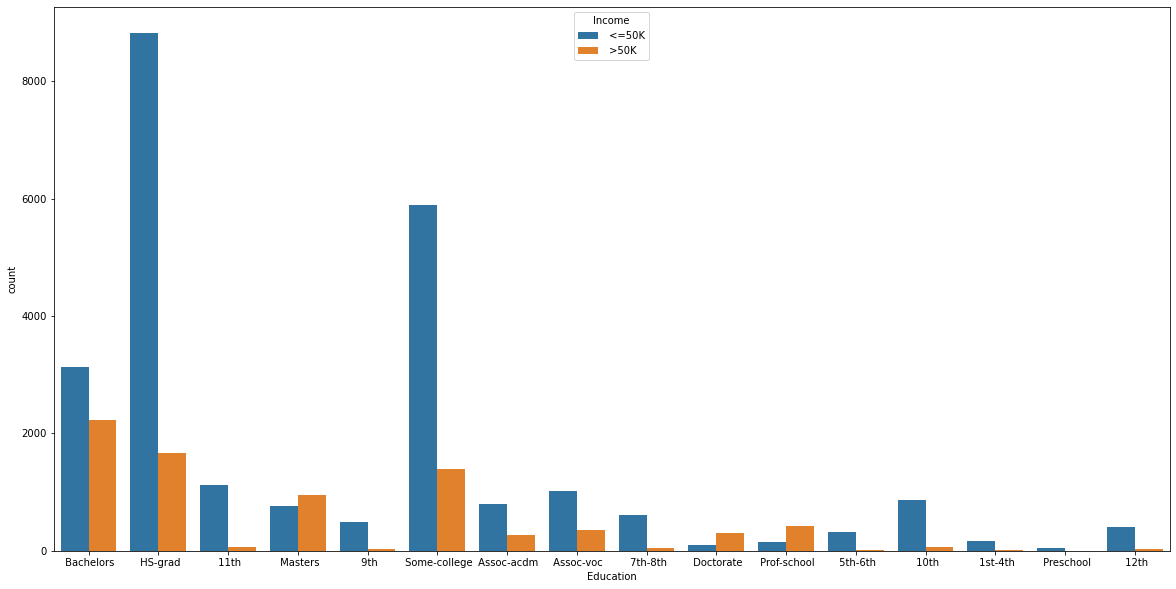

In [21]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Education',hue='Income',data=df1)

Most of the people has their education of "HS-grad" get less than 50k census income and some have been to completed some_college get most less than 50k above show count bar and few has completed the bachelors degree get income most are lessthan 50k

In [22]:
df1['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

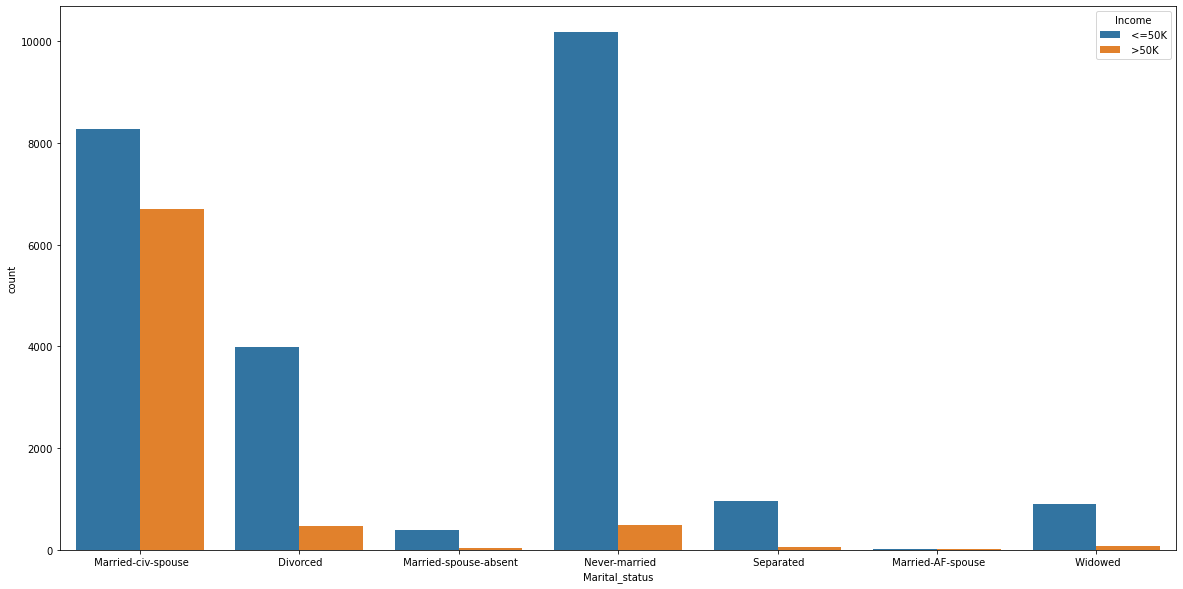

In [23]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Marital_status',hue='Income',data=df1)

Most of the people are married vid spouse in census income and in that above 8k+ are get less than 50k and b/n 6000 to 6500 are get greater than 50k in terms of marital status and some are never married are get less than 50k in above count shows and few are divorced and we can see very few for rest of them like widowed,separated as per the above bar plot

In [24]:
df1['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

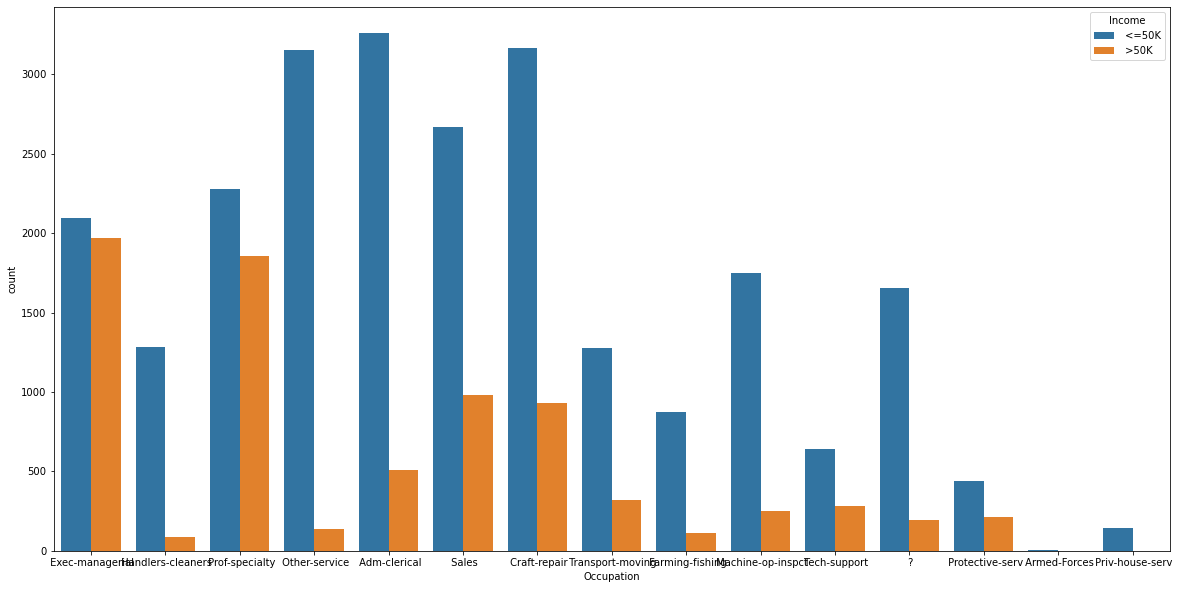

In [25]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Occupation',hue='Income',data=df1)

As per the count plot, we observed that most of the people occupation are belongs to other-service, craft -repair, sales ,Adm-clerical,Prof-speciality,Exec-managerial,and these all occupation peoples are get less than 50k and we can see very very few in armed forces and priv-hosue servant.

In [26]:
df1['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

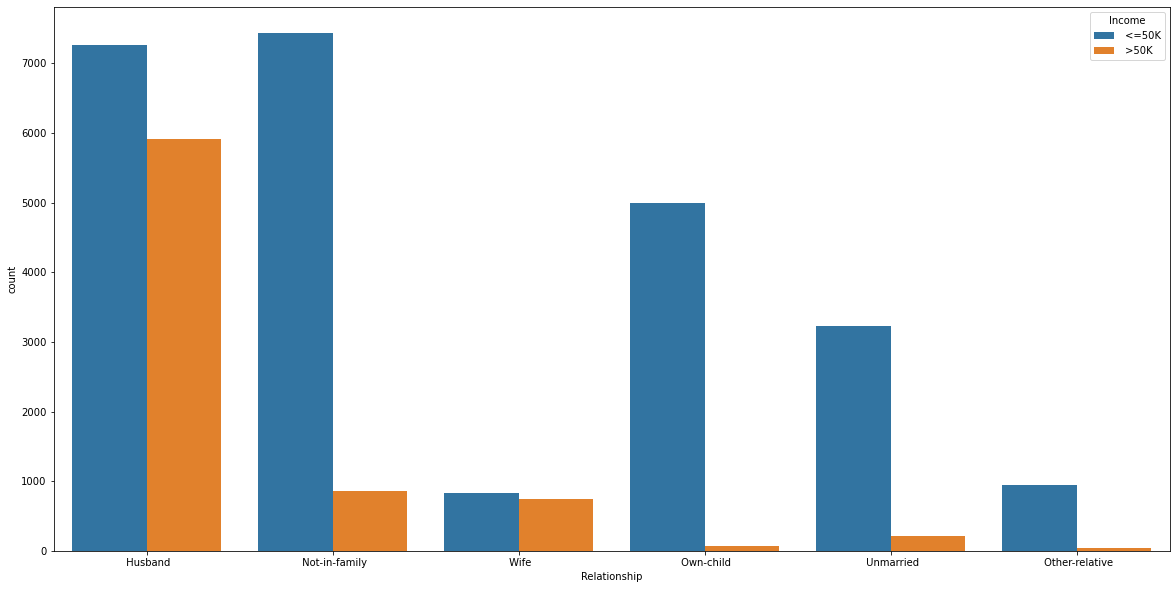

In [27]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Relationship',hue='Income',data=df1)

Most of the people relationships are "Husband" is having high in counts and it might be the census is taken with the head of the family relationship with that family.

In [28]:
df1['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

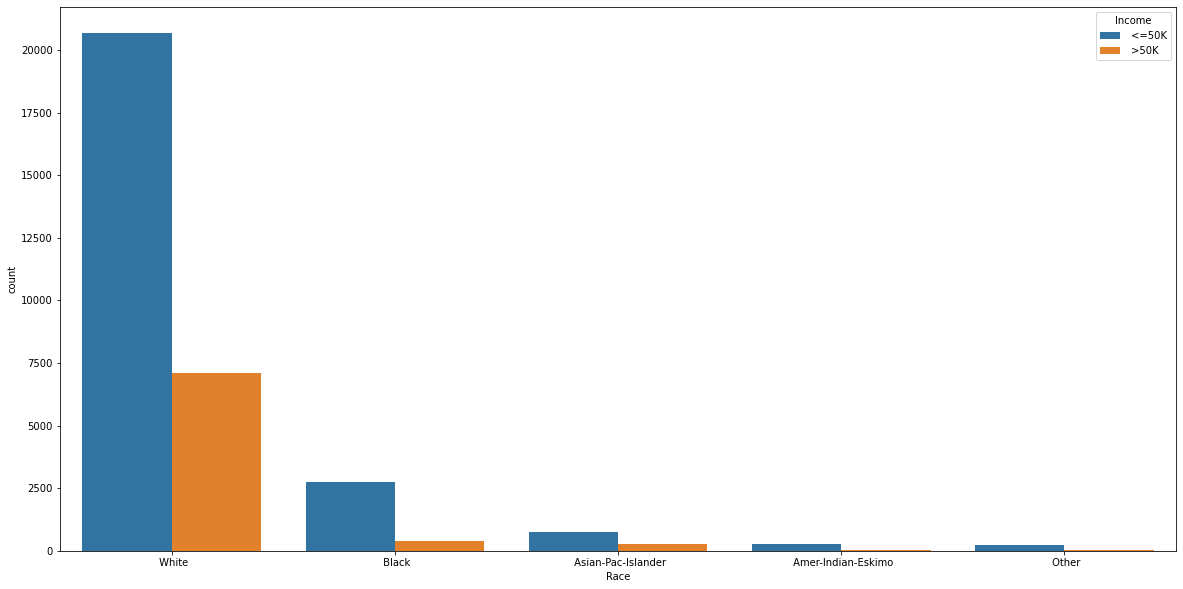

In [29]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Race',hue='Income',data=df1)

White people are more in terms of race in census and there are people take less than 50k census-income

In [30]:
df1['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

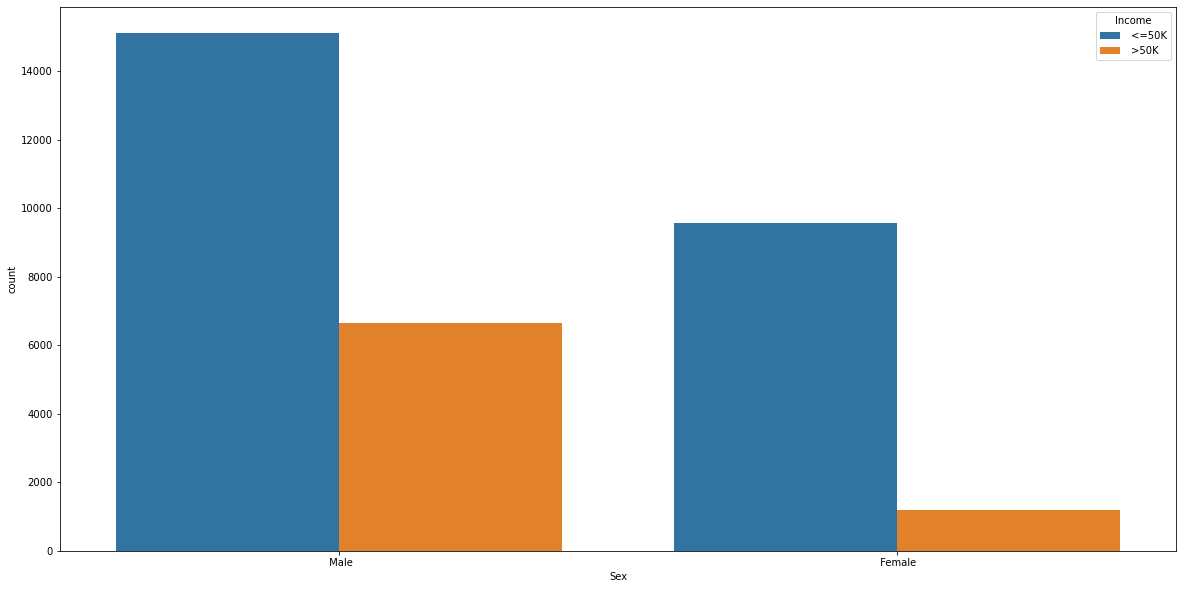

In [31]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Sex',hue='Income',data=df1)

Male is more in gender than Female and male are more count get leess than 50k census-income as per the count plot

In [32]:
df1['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

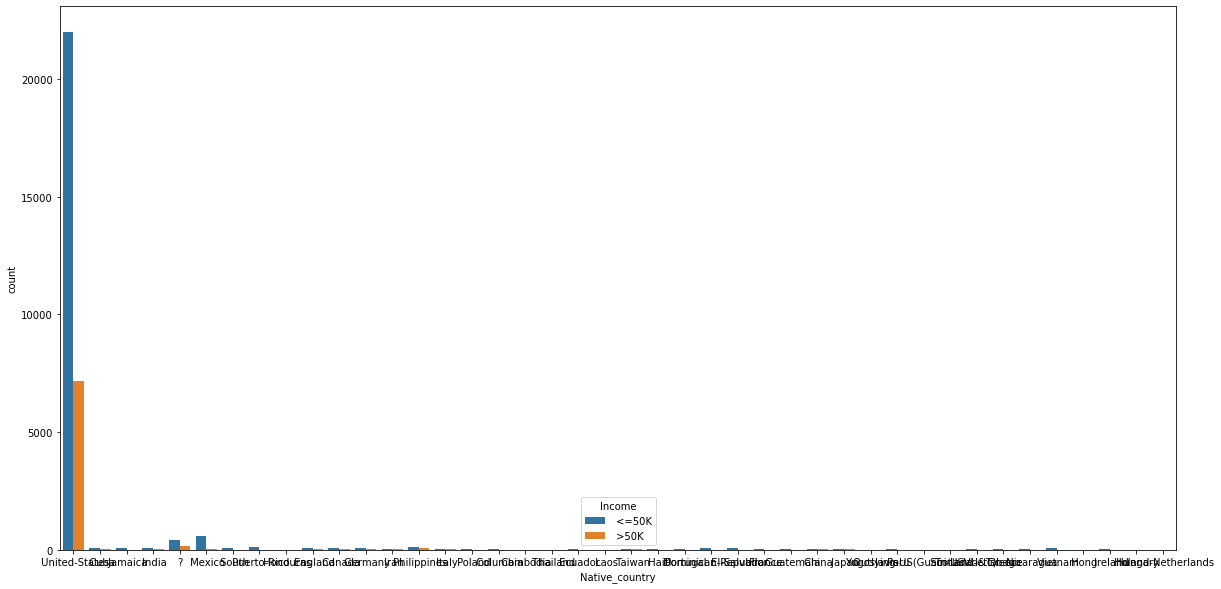

In [33]:
#Lets visualize the count of workclass using seaborn
plt.figure(figsize=(20,10))
sns.countplot(x='Native_country',hue='Income',data=df1)

Most of people who has given this census less than 50k are more count belongs to United States.

Now do divide categorical and numerical coumns

In [34]:
num_col = df1.select_dtypes(exclude = object)
cat_col = df1.select_dtypes(include = object)


In [35]:
num_col

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [36]:
cat_col

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


here one thing is pending while we do the countplotb we got a questionmark symbol instead of data and we can do replace that question mark with mean median or mode ,it indicates a not known value if we replace the name any thing unkown category now use strip function for replace that question mark symbol to unknown categorey

Workclass,Occupation,Native_country these are the columns have question mark

In [37]:
columns = ['Workclass','Occupation','Native_country']
for col in columns:
    cat_col[col] = cat_col[col].str.strip().replace({'?':'None'})




Now check it is it changed are not

In [38]:
cat_col['Workclass'].value_counts()



Private             22673
Self-emp-not-inc     2540
Local-gov            2093
None                 1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [39]:

cat_col['Occupation'].value_counts()


Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
None                 1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: Occupation, dtype: int64

In [40]:
cat_col['Native_country'].value_counts()



United-States                 29152
Mexico                          639
None                            582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

now in three columns are replaced with none

Now change categorical columns into numerical so everyown knows machinelearning cant understand categorical

LabelEncoder() here to convert categorical to numerical data,

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cat_col = cat_col.apply(labelencoder.fit_transform)




Now all are coverted into a numerical data so we do check a dataframe

In [42]:
cat_col.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,9,2,3,0,4,1,39,0
1,4,11,0,5,1,4,1,39,0
2,4,1,2,5,0,2,1,39,0
3,4,9,2,10,5,2,0,4,0
4,4,12,2,3,5,4,0,39,0


Now all are coverted into a numerical data so we do check a dataframe

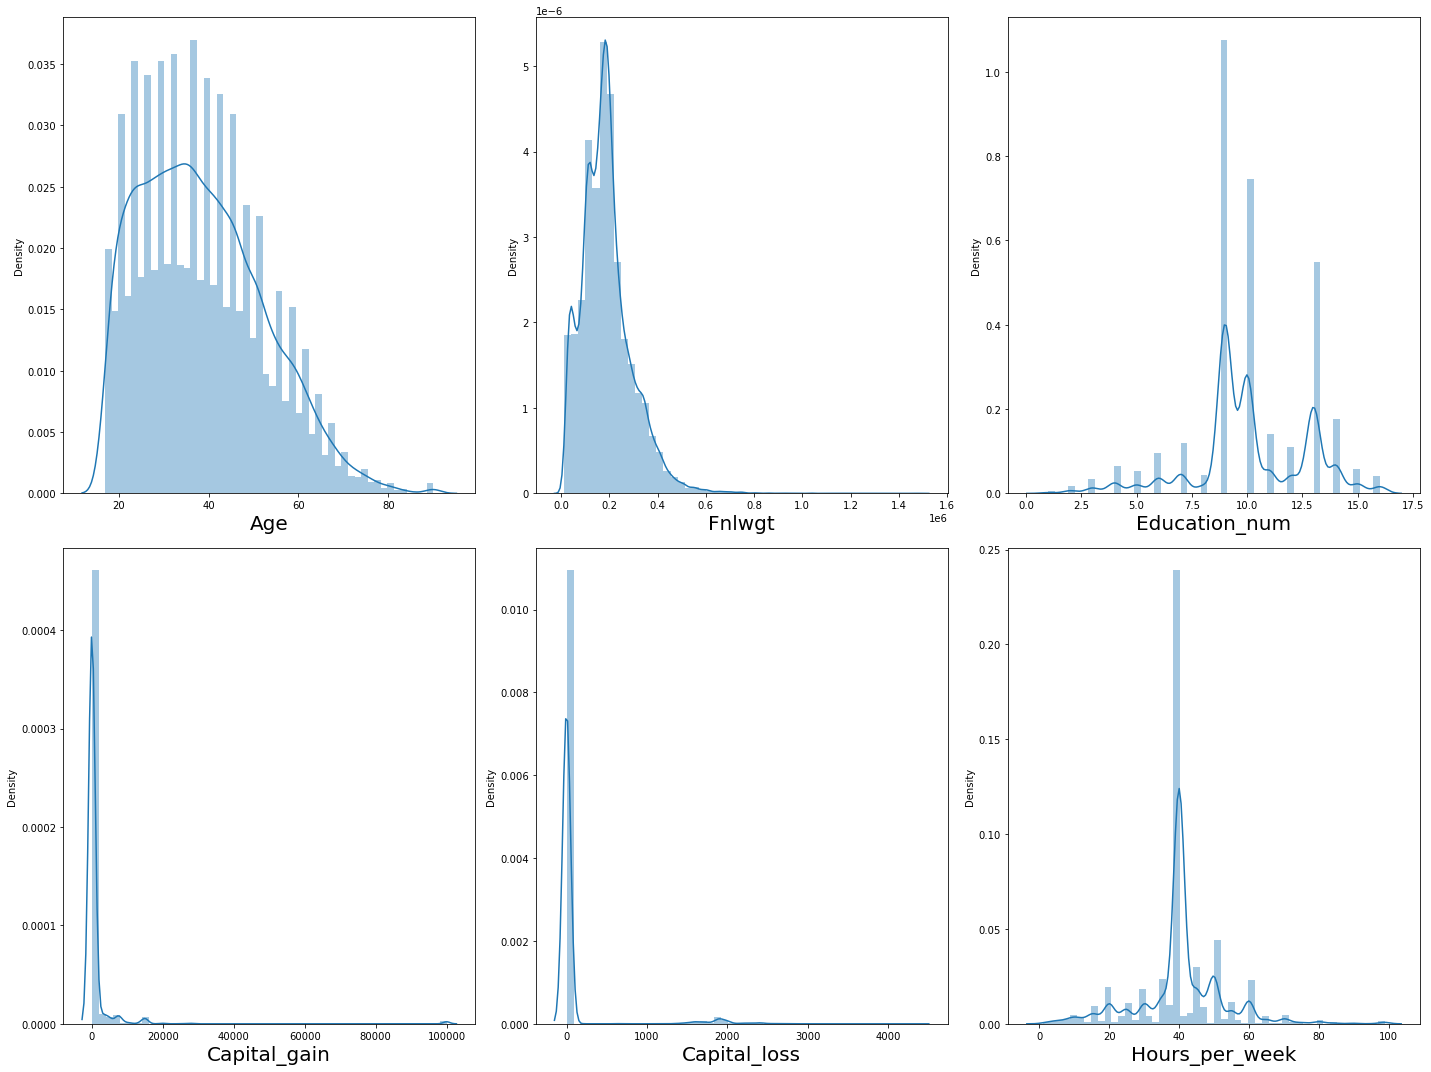

In [43]:
#how data distributed every column by visualiation
plt.figure(figsize =(20,15))
plotnumber =1

for column in num_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(num_col[column])
        plt.xlabel(column,fontsize = 20)

     
    plotnumber+=1
plt.tight_layout()


there so many outliers are showing in almost every columns our data has not normally distributed some are skewed rigt side now use bosx plot to check otliers and do removel outliers use z score if use z score after that if outliers not removed all then use quantile method

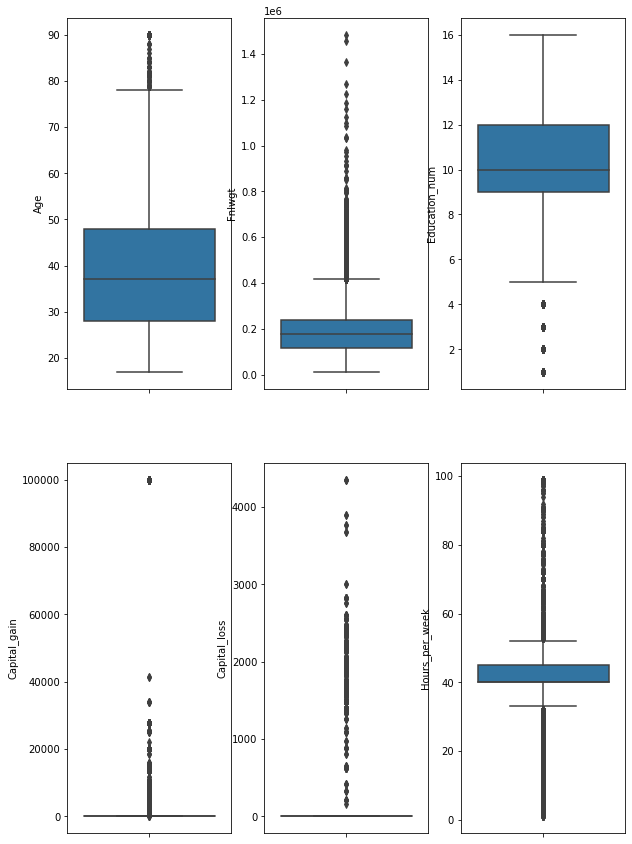

In [44]:
#use boxplot
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(10,15))
index=0
ax= ax.flatten()

for col,value in num_col.items():
    if col !='type':
        sns.boxplot(y=col,data=num_col,ax=ax[index])
        index+=1



In [45]:
from scipy.stats import zscore
z=zscore(num_col)
z




array([[ 0.83696128, -1.0087032 ,  1.13481701, -0.14596869, -0.21674666,
        -2.22244997],
       [-0.04293421,  0.24500772, -0.42064566, -0.14596869, -0.21674666,
        -0.03566429],
       [ 1.05693515,  0.42571982, -1.198377  , -0.14596869, -0.21674666,
        -0.03566429],
       ...,
       [ 1.42355827, -0.35881227, -0.42064566, -0.14596869, -0.21674666,
        -0.03566429],
       [-1.21612819,  0.11089708, -0.42064566, -0.14596869, -0.21674666,
        -1.65550554],
       [ 0.98361053,  0.92978106, -0.42064566,  1.88761167, -0.21674666,
        -0.03566429]])

In [46]:
threshold = 3
print(np.where(z>3))



(array([    9,    22,    27, ..., 32493, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 3, 0, 5], dtype=int64))


In [47]:
df_new = num_col [(z<3).all(axis =1)]



In [48]:
df1.shape

(32536, 15)

In [49]:
df_new.shape

(30084, 6)

In [50]:
# data loss
(32536-30084)/32536*100

7.536267519055816

here we lossing 8% of data usiing zscore ok lets move to check the skewness and if any skewness more than +-0.5,we will remove it

In [51]:
df_new.skew()

Age                0.493555
Fnlwgt             0.634961
Education_num     -0.321417
Capital_gain       4.959541
Capital_loss      29.614763
Hours_per_week    -0.405846
dtype: float64

using z score skewnss are not removed perfectly then use quantile method

In [52]:
quant = num_col['Age'].quantile(0.99)
num_colm =num_col['Age'][num_col['Age']<quant]

quant = num_col['Fnlwgt'].quantile(0.98)
num_colm =num_col['Fnlwgt'][num_col['Fnlwgt']<quant]

quant = num_col['Education_num'].quantile(0.01)
num_colm =num_col['Education_num'][num_col['Education_num']<quant]


quant = num_col['Hours_per_week'].quantile(0.01)
num_colm =num_col['Hours_per_week'][num_col['Hours_per_week']<quant]

quant = num_col['Hours_per_week'].quantile(0.98)
num_colm =num_col['Hours_per_week'][num_col['Hours_per_week']<quant]





Applying quantile method to remove the data. As Capital_loss and Capital_gain is having 0 has most of the values ,When we try to remove this,we are losing max number of data.so skipping that two columns.

In [53]:
quant1 =num_col['Age'].quantile(0.99)
quant2 =num_col['Fnlwgt'].quantile(0.98)
quant3 =num_col['Education_num'].quantile(0.01)
quant4 =num_col['Hours_per_week'].quantile(0.98)
#quant5 =num_col['Capital_loss'].quantile(0.97)
#quant6 =num_col['Capital_gain'].quantile(0.97)
quant7 =num_col['Hours_per_week'].quantile(0.01)


In [54]:



print(num_col.shape)
num_col = num_col[num_col['Age'] <quant1]
print(num_col.shape)
num_col = num_col[num_col['Fnlwgt'] <quant2]
print(num_col.shape)
num_col = num_col[num_col['Education_num'] >quant3]
print(num_col.shape)
num_col = num_col[num_col['Hours_per_week'] <quant4]
print(num_col.shape)
num_col = num_col[num_col['Hours_per_week'] >quant7]
print(num_col.shape)

(32536, 6)
(32200, 6)
(31550, 6)
(31049, 6)
(30284, 6)
(29913, 6)


In [55]:
num_col.skew()

Age                0.403989
Fnlwgt             0.506461
Education_num      0.006394
Capital_gain      12.203903
Capital_loss       4.535806
Hours_per_week    -0.455392
dtype: float64

After zscore and quantile tecnique hase skewness little different so their quantrile removal is best and it losses 8% data. We can see that data is having skewness in capital loss and capital gain and we didnt remove those column as it didnt make any great difference in accuracy of model after removing as well.So keeping those features and going to build a model.

In [56]:
df2=pd.concat([num_col,cat_col],axis =1)
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,3,0,4,1,39,0
1,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,5,1,4,1,39,0
2,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,5,0,2,1,39,0
3,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,4,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,4,12,2,3,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,257302.0,12.0,0.0,0.0,38.0,4,7,2,13,5,4,0,39,0
32556,40.0,154374.0,9.0,0.0,0.0,40.0,4,11,2,6,0,4,1,39,1
32557,58.0,151910.0,9.0,0.0,0.0,40.0,4,11,6,0,4,4,0,39,0
32558,22.0,201490.0,9.0,0.0,0.0,20.0,4,11,4,0,3,4,1,39,0


In [57]:
# droppint the na columns
df2 =df2.dropna()
df2 =df2.reset_index(drop=True)


In [58]:
df2.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,3,0,4,1,39,0
1,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,5,1,4,1,39,0
2,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,5,0,2,1,39,0
3,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,4,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,4,12,2,3,5,4,0,39,0


In [59]:
df2.shape

(29913, 15)

In [60]:
#data loss calculate for quantile method
(32536-29913)/32536*100

8.061839193508728

8% dataset losses after quantile method now we can proceed data modeling before we check correlation b/w features and target data

In [61]:
#Checking the correlation 
df2.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
Age,1.000000,-0.066489,0.068328,0.084949,0.057866,0.149021,0.006447,0.001791,-0.309524,-0.008415,-0.268049,0.028991,0.094346,-0.001868,0.264813
Fnlwgt,-0.066489,1.000000,-0.021114,-0.000954,-0.004312,-0.016924,-0.016723,-0.012021,0.028222,0.002337,0.003550,-0.010967,0.027314,-0.047578,-0.001904
Education_num,0.068328,-0.021114,1.000000,0.120929,0.082293,0.176173,-0.011094,0.308748,-0.063241,0.101268,-0.108867,0.031646,0.022206,-0.002218,0.339532
Capital_gain,0.084949,-0.000954,0.120929,1.000000,-0.031891,0.080843,0.028383,0.027000,-0.042969,0.018316,-0.056610,0.010211,0.045772,0.002469,0.221472
Capital_loss,0.057866,-0.004312,0.082293,-0.031891,1.000000,0.057403,-0.004401,0.014267,-0.034237,0.011893,-0.060362,0.018536,0.046879,0.004125,0.150960
Hours_per_week,0.149021,-0.016924,0.176173,0.080843,0.057403,1.000000,0.035570,0.052202,-0.201567,-0.006559,-0.277778,0.050208,0.240909,0.002332,0.252820
Workclass,0.006447,-0.016723,-0.011094,0.028383,-0.004401,0.035570,1.000000,0.001983,-0.018495,-0.001413,-0.056753,0.053134,0.071228,-0.009115,-0.002847
Education,0.001791,-0.012021,0.308748,0.027000,0.014267,0.052202,0.001983,1.000000,-0.034414,-0.034403,-0.012450,0.015626,-0.025986,0.038934,0.065059
Marital_status,-0.309524,0.028222,-0.063241,-0.042969,-0.034237,-0.201567,-0.018495,-0.034414,1.000000,0.028615,0.182821,-0.069538,-0.120731,-0.017674,-0.198518
Occupation,-0.008415,0.002337,0.101268,0.018316,0.011893,-0.006559,-0.001413,-0.034403,0.028615,1.000000,-0.042990,-0.001406,0.046270,-0.008927,0.044602


<function matplotlib.pyplot.show(close=None, block=None)>

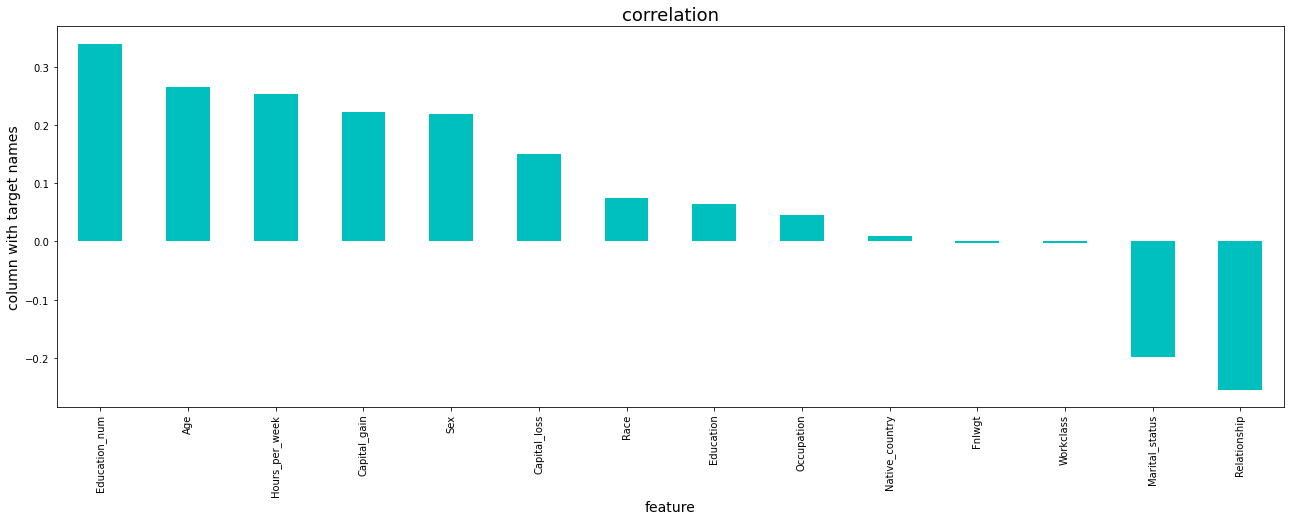

In [62]:
#visualize correlation b/w features and target variables
plt.figure(figsize=(22,7))
df2.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

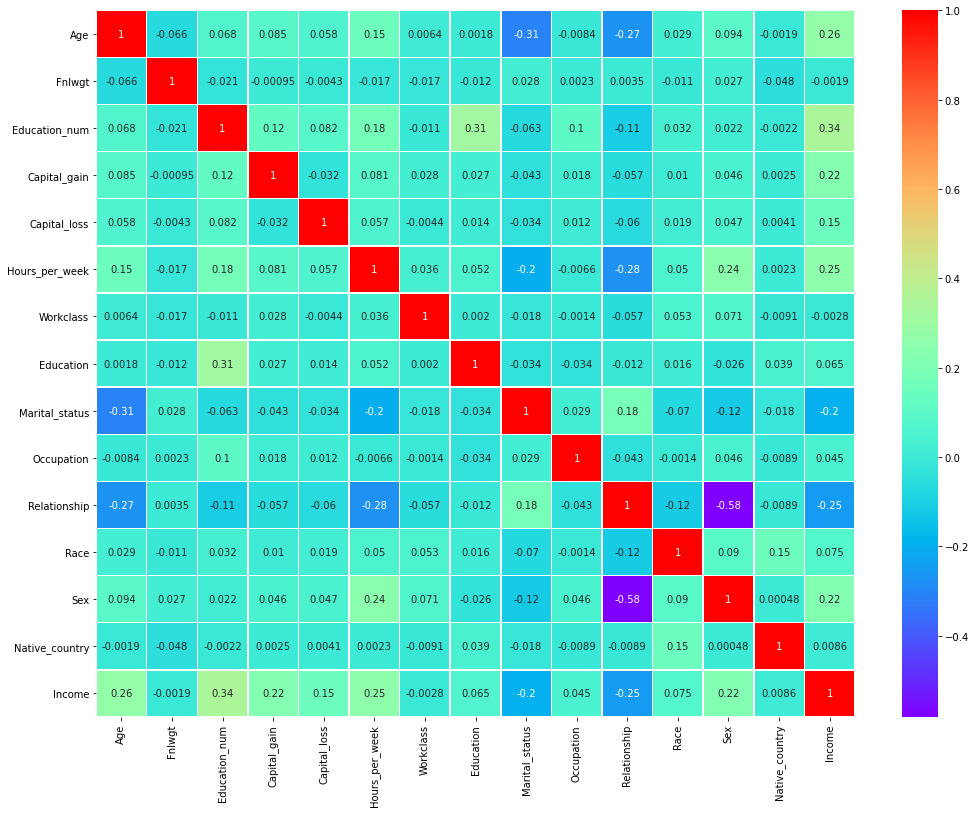

In [63]:
#using heatmap to visualization correlation b/w features and target variables
#heat map
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df2.corr(),cmap = 'rainbow', annot=True, linewidths=.5, ax=ax)
plt.show()

we do not have any correlation for features and target variables

now seperate target and weight in our cleaned dataset

In [64]:
X = df2.drop(columns = ['Income'],axis = 1)
y = df2['Income']

In [65]:
X.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,3,0,4,1,39
1,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,5,1,4,1,39
2,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,5,0,2,1,39
3,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,4
4,37.0,284582.0,14.0,0.0,0.0,40.0,4,12,2,3,5,4,0,39


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [67]:
x.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.927435,-1.095088,1.176566,-0.146225,-0.218093,-2.694364,1.531057,-0.373654,-0.397751,-0.786468,-0.907237,0.392183,0.709768,0.270253
1,-0.000838,0.369192,-0.513980,-0.146225,-0.218093,-0.011067,0.050629,0.153195,-1.728689,-0.329655,-0.286865,0.392183,0.709768,0.270253
2,1.159503,0.580256,-1.359253,-0.146225,-0.218093,-0.011067,0.050629,-2.481051,-0.397751,-0.329655,-0.907237,-1.963748,0.709768,0.270253
3,-0.774399,1.727558,1.176566,-0.146225,-0.218093,-0.011067,0.050629,-0.373654,-0.397751,0.812376,2.194625,-1.963748,-1.408911,-5.392113
4,-0.078194,1.131965,1.599203,-0.146225,-0.218093,-0.011067,0.050629,0.416620,-0.397751,-0.786468,2.194625,0.392183,-1.408911,0.270253


In [68]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29908    0
29909    1
29910    0
29911    0
29912    1
Name: Income, Length: 29913, dtype: int32

In [69]:
y.value_counts()

0    22595
1     7318
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

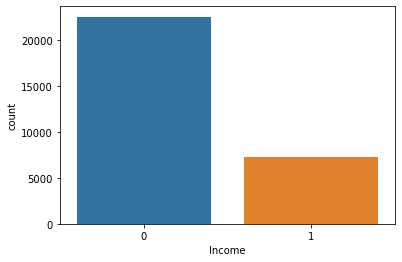

In [70]:
#let’s visualize the count of target variable using Seaborn
sns.countplot(df2['Income'])

We can see that classes are imbalanced and we use SMOTE() technique to balance the imbalanced dataset,

In [73]:
#convert imbalanced data into balance data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x , y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

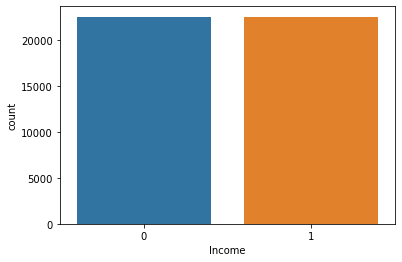

In [72]:
#Now the classes are balanced.

sns.countplot(y)

In [74]:
y.value_counts()

0    22595
1    22595
Name: Income, dtype: int64

# Model building

In [76]:
##import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [77]:
#split train test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=50)

In [78]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36152, 14), (9038, 14), (36152,), (9038,))

In [80]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.96      0.84      0.89     18155
           1       0.85      0.96      0.91     17997

    accuracy                           0.90     36152
   macro avg       0.91      0.90      0.90     36152
weighted avg       0.91      0.90      0.90     36152

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4440
           1       0.81      0.93      0.87      4598

    accuracy                           0.86      9038
   macro avg       0.87      0.86      0.86      9038
weighted avg       0.86      0.86      0.86      9038



In [81]:
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

Training accuracy:: 0.8994523124585085
Test accuracy:: 0.8566054436822306


In [82]:
print(cross_val_score(KNN,x,y,cv=3).mean())

0.8563401668970733


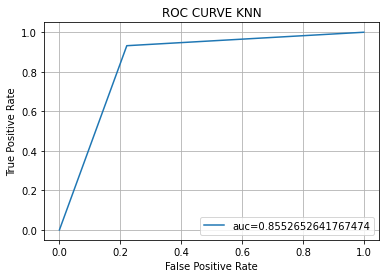

The Score for the ROC AUC Curve is : 85.53%


In [83]:
#roc_curve plot to check the socre of knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

In [84]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18155
           1       1.00      1.00      1.00     17997

    accuracy                           1.00     36152
   macro avg       1.00      1.00      1.00     36152
weighted avg       1.00      1.00      1.00     36152

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4440
           1       0.90      0.91      0.91      4598

    accuracy                           0.90      9038
   macro avg       0.90      0.90      0.90      9038
weighted avg       0.90      0.90      0.90      9038



In [85]:
print("Training accuracy::",RFC.score(x_train,y_train))
print("Test accuracy::",RFC.score(x_test,y_test))

Training accuracy:: 0.9999723390130559
Test accuracy:: 0.9027439699048462


In [86]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8995795529984509


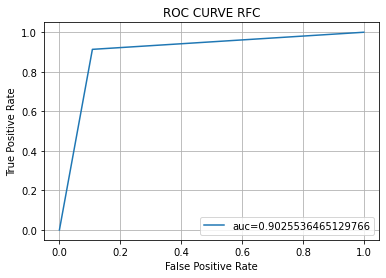

The Score for the ROC Curve is : 90.25999999999999%


In [87]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [88]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)


#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18155
           1       1.00      1.00      1.00     17997

    accuracy                           1.00     36152
   macro avg       1.00      1.00      1.00     36152
weighted avg       1.00      1.00      1.00     36152

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4440
           1       0.86      0.85      0.86      4598

    accuracy                           0.85      9038
   macro avg       0.85      0.85      0.85      9038
weighted avg       0.85      0.85      0.85      9038



In [89]:
print("Training accuracy::",DecisionTree.score(x_train,y_train))
print("Test accuracy::",DecisionTree.score(x_test,y_test))

Training accuracy:: 0.9999723390130559
Test accuracy:: 0.8529541934056207


In [90]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.8554326178358045


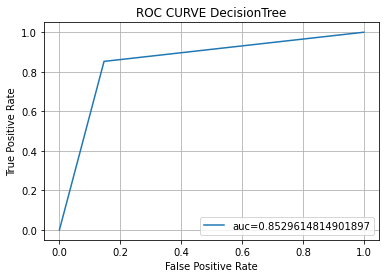

The Score for the ROC Curve is : 85.3%


In [91]:
#roc_curve plot to check the socre of Decisiontree
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [92]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.77      0.77      0.77     18155
           1       0.77      0.77      0.77     17997

    accuracy                           0.77     36152
   macro avg       0.77      0.77      0.77     36152
weighted avg       0.77      0.77      0.77     36152

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4440
           1       0.78      0.77      0.78      4598

    accuracy                           0.78      9038
   macro avg       0.78      0.78      0.78      9038
weighted avg       0.78      0.78      0.78      9038



In [93]:
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

Training accuracy:: 0.7726820092940916
Test accuracy:: 0.7750608541712768


In [94]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7725603009515379


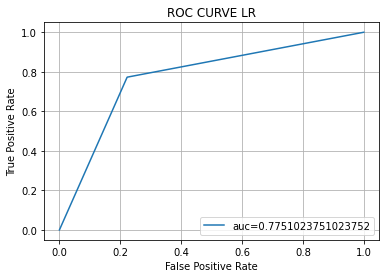

The Score for the ROC Curve is : 77.51%


In [95]:
#roc_curve plot to check the socre of LogesticRegression
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# ENSEMBLE TECHNIQUES

In [96]:
#train result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85     18155
           1       0.84      0.88      0.86     17997

    accuracy                           0.85     36152
   macro avg       0.85      0.85      0.85     36152
weighted avg       0.85      0.85      0.85     36152

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4440
           1       0.84      0.87      0.86      4598

    accuracy                           0.85      9038
   macro avg       0.85      0.85      0.85      9038
weighted avg       0.85      0.85      0.85      9038



In [97]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.8526222615622926
Test accuracy:: 0.8501880947112193


In [98]:
print(cross_val_score(adb,x,y,cv=10).mean())

0.8509847311352068


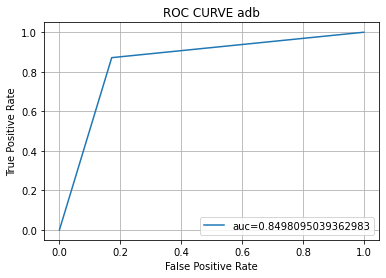

The Score for the ROC Curve is : 84.98%


In [99]:
#roc_curve plot to check the socre of AdaBoostClassifier
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE adb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [100]:
#train result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.89      0.85      0.87     18155
           1       0.85      0.90      0.87     17997

    accuracy                           0.87     36152
   macro avg       0.87      0.87      0.87     36152
weighted avg       0.87      0.87      0.87     36152

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4440
           1       0.85      0.89      0.87      4598

    accuracy                           0.86      9038
   macro avg       0.86      0.86      0.86      9038
weighted avg       0.86      0.86      0.86      9038



In [101]:
print("Training accuracy::",gbc.score(x_train,y_train))
print("Test accuracy::",gbc.score(x_test,y_test))

Training accuracy:: 0.8704082761672937
Test accuracy:: 0.8639079442354504


In [102]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.862425315335251


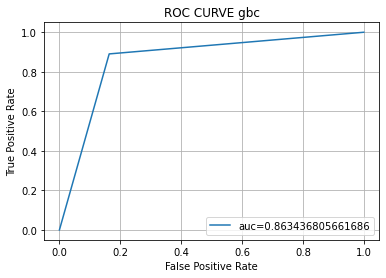

The Score for the ROC Curve is : 86.33999999999999%


In [103]:
#roc_curve plot to check the socre of GradientBoostClassifier
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE gbc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

inding the difference of F1 Score accuracy and cross validation score accuracy and the random forest model is having less difference is considered as best model and applying Hyper parameter tuning to increase the accuracy of that model.

# HyperParametr Tuning

In [107]:
params ={'max_depth':list(range(200,400,50)),
            'n_estimators':list(range(10,120,20)),
            'max_features': ['auto', 'sqrt', 'log2'],      
         }

In [108]:
model=RandomForestClassifier()

In [109]:
grid_clf=GridSearchCV(model,params,verbose=4,refit=True,n_jobs = -1)

In [110]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [111]:
final_model=grid_clf.best_estimator_
print(final_model)

RandomForestClassifier(max_depth=300, max_features='sqrt', n_estimators=110)


In [112]:
final_model=grid_clf.best_params_
print(final_model)

{'max_depth': 300, 'max_features': 'sqrt', 'n_estimators': 110}


In [113]:
final_model=grid_clf.best_score_
print(final_model)

0.8943350485165205


In [114]:
final_model = RandomForestClassifier(n_estimators=110 , max_features = 'log2', max_depth = 350)                              
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.9017481743748617

In [115]:
y_pred=final_model.predict(x_test)

In [116]:
accuracy_score(y_test,y_pred)

0.9017481743748617

In [117]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.898628015047577


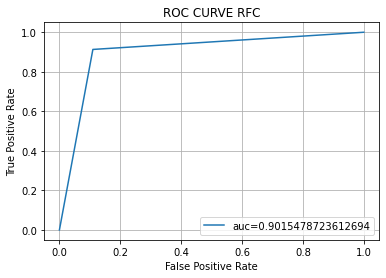

The Score for the ROC Curve is : 90.14999999999999%


In [118]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

After hyper parameter our final model is icreased to 91% accuracy

In [120]:
import joblib
joblib.dump(final_model,"Census_Income_Project")

['Census_Income_Project']